In [1]:
#importing libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#display Image
def displayImg(img):
    plt.figure(figsize=(10.24,10.24))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()

In [35]:
def angleInRadian(angle):
    return angle*np.pi/180

In [73]:
#Initialization
x_resolution=512
y_resolution=512
FOVx=FOVy=8
sigma=1.5#defocus level
#need to add more

# Mathmatical Modeling

1. Calc. of Rotational Mat. M

In [74]:
def getRotationalMat(alpha_0,delta_0,phi_0):
    """Gets the ascension, declination and role angle as inputs and return a rotational matrix"""
    a1=(np.sin(alpha_0)*np.cos(phi_0))-(np.cos(alpha_0)*np.sin(delta_0)*np.sin(phi_0))
    a2=(-np.sin(alpha_0)*np.sin(phi_0))-(np.cos(alpha_0)*np.sin(delta_0)*np.cos(phi_0))
    a3=-np.cos(alpha_0)*np.cos(delta_0)
    b1=(-np.cos(alpha_0)*np.cos(phi_0))-(np.sin(alpha_0)*np.sin(delta_0)*np.sin(phi_0))
    b2=(np.cos(alpha_0)*np.sin(phi_0))-(np.sin(alpha_0)*np.sin(delta_0)*np.cos(phi_0))
    b3=-np.sin(alpha_0)*np.cos(delta_0)
    c1=np.cos(alpha_0)*np.sin(phi_0)
    c2=np.cos(alpha_0)*np.cos(phi_0)
    c3=-np.sin(delta_0)
    M=np.array([
        [a1,a2,a3],
        [b1,b2,b3],
        [c1,c2,c3]
    ],dtype="float64")
    return M.transpose()

In [75]:
def obtainStarSensorCoordinateSystem(M_T,alpha_i,delta_i):
    """
    M_T=Transpose of orthogonal matrix. ie. Rotational Matrix
    alpha_i=ith ascension
    delta_i=ith declination
    """
    direction_vector_of_stars_in_celestial_coord_sys=np.array([
        [np.cos(alpha_i)*np.cos(delta_i)],
        [np.sin(alpha_i)*np.cos(delta_i)],
        [np.sin(delta_i)]
    ],dtype="float64")
    return np.matmul(M_T,direction_vector_of_stars_in_celestial_coord_sys)

# Condition stars ascension and declination in the cameras FOV frame

In [76]:
def checkStarsAlphaDeltaWithInFOV(alpha_i,delta_i,alpha_0,delta_0,FOVx,FOVy):
    """
    Takes stars position, camera position and FOV as input and checks whether
    stars position is within camera FOV frame
    If returns True, stars position is within FOV
    """
    R=np.sqrt((FOVx**2)+(FOVy**2))/2
    R=angleInRadian(R)
    rangeOfAlpha=np.array([alpha_0-(R/np.cos(delta_0)),alpha_0+(R/np.cos(delta_0))])
    rangeOfDelta=np.array([delta_0-R,delta_0+R])
    return np.logical_and(rangeOfAlpha[0]<alpha_i<rangeOfAlpha[1],rangeOfDelta[0]<delta_i<rangeOfDelta[1])
    

# Projection

In [77]:
def getPixelXY(res_x,res_y,sensor_coord_mat):
    fx=res_x/(2*np.tan(FOVx/2))
    fy=res_y/(2*np.tan(FOVy/2))
    proj_mat=np.array([
        [fx,0,res_x/2],
        [0,fy,res_y/2],
        [0,0,1]
    ])
    
    return np.matmul(proj_mat,sensor_coord_mat)+np.array([
        [res_x/2],
        [res_y/2],
        [0]
       ])

In [78]:
def getPixelXYAxis():
    pass

In [79]:
stars_coords=np.array([
    [18.5318,16.1335,5.970],
    [23.9783,17.4337,5.910],
    [16.4240,21.4656,5.560],
    [23.7046,18.4604,5.916],
    [21.5636,19.1723,5.325],
    [ 21.6736,19.2404,5.494],
    [17.4549,19.6583,5.568],
    [20.8540,20.4691,5.971],
    [ 16.9881,20.7389,5.570],
    [17.8634,21.0346,4.660],
    [22.4703,18.3557,6.000]
])

In [80]:
M_T=getRotationalMat(angleInRadian(20),angleInRadian(20),angleInRadian(90))
M_T

array([[-3.21393805e-01, -1.16977778e-01,  9.39692621e-01],
       [-3.42020143e-01,  9.39692621e-01,  5.75395780e-17],
       [-8.83022222e-01, -3.21393805e-01, -3.42020143e-01]])

In [81]:
sensor_coords=[]
Mvs=[]
for i in stars_coords:
    #if checkStarsAlphaDeltaWithInFOV(i[0],i[1],angleInRadian(20),angleInRadian(20),FOVx=FOVx,FOVy=FOVy):
    Mvs.append(i[2])
    sensor_coords.append(obtainStarSensorCoordinateSystem(M_T,i[0],i[1]))
print(sensor_coords)
print(Mvs)

[array([[-0.1431262 ],
       [ 0.56333293],
       [ 0.81373884]]), array([[-0.9319847 ],
       [-0.15397198],
       [ 0.32817244]]), array([[ 0.19526712],
       [ 0.31037057],
       [-0.93034448]]), array([[-0.29167124],
       [-0.90558963],
       [ 0.30795342]]), array([[0.52940619],
       [0.66468175],
       [0.52718807]]), array([[0.60652324],
       [0.57169923],
       [0.55253014]]), array([[ 0.72042329],
       [-0.68011053],
       [-0.13579374]]), array([[ 0.93716835],
       [-0.04855425],
       [-0.34548221]]), array([[ 0.82847196],
       [ 0.25125787],
       [-0.50050344]]), array([[ 0.81393204],
       [ 0.56042555],
       [-0.1530942 ]]), array([[-0.1468292 ],
       [-0.11421908],
       [ 0.98254526]])]
[5.97, 5.91, 5.56, 5.916, 5.325, 5.494, 5.568, 5.971, 5.57, 4.66, 6.0]


# Projection to pixels

In [82]:
pixels=[]
for i in sensor_coords:
    pixels.append(getPixelXY(x_resolution,y_resolution,i).reshape(3)[:2])
pixels

[array([432.671235  , 588.87283452]),
 array([133.94572656, 305.96817908]),
 array([61.0063359 , 86.45627811]),
 array([270.34612611, 134.6057396 ]),
 array([508.01446546, 537.92456093]),
 array([531.55299674, 523.8532362 ]),
 array([380.52594776,  70.86100622]),
 array([374.76910186, 156.82096958]),
 array([311.05035829, 183.42547428]),
 array([396.77227562, 340.72074036]),
 array([475.06692544, 482.27718408])]

In reality, the optical lens cannot achieve perfect persective imaging but has different degrees of distortion. As the reason, the image  is not exactly at (X,Y).
{X'=X+dx,Y'=Y+dy<br>
dx and dy are distortion value

# The composition of the Digital Star Image
A Point Spreading Function(PSF) is used to simulate the spreading of the light upon multiple pizels

In [83]:
def psfGaussianDistribution(x,y,Mv):
    k1=1000
    k2=k3=1
    H=k1*np.exp(-k2*Mv+k3)
    num=np.exp(-((x**2)+(y**2))/(2*(sigma**2)),dtype="float128")
    den=2*3.14*(sigma**2)
    return H*num/den
def Add_Noise(image,noiseLevel):
    noise=np.random.normal(0,noiseLevel,size=(x_resolution,y_resolution))
    return image+noise
    

(512, 512)


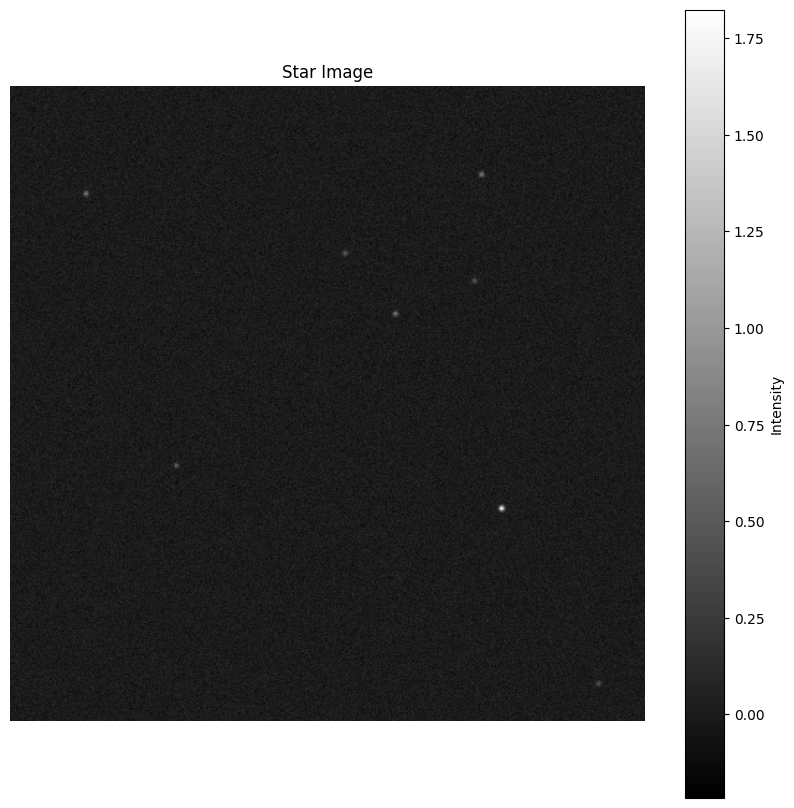

In [89]:
# Calculate Gaussian PSF
# Create grid of coordinates
x = np.linspace(0,x_resolution,y_resolution)
y = np.linspace(0,x_resolution,y_resolution)
X, Y = np.meshgrid(x, y)
noiseLevel=0.05
# Calculate PSF values
PSF=np.zeros_like(Y)
for i in range(len(pixels)):
    PSF +=psfGaussianDistribution(X-pixels[i][0],Y-pixels[i][1],Mvs[i])#gaussian_psf(X - X_points[i], Y - Y_points[i])

print(PSF.shape)
# Display PSF as an image
plt.figure(figsize=(10.24,10.24))
plt.imshow(Add_Noise(PSF,noiseLevel),cmap="gray")
plt.colorbar(label='Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('off')
plt.title('Star Image')
plt.show()
plt.imsave("plot.png",PSF,cmap="gray")


# Adding Noise

In [30]:
np.sin(30)

-0.9880316240928618